# 03-04 - Ensembles and Statistical Inference

*May 11 2022*  

We implement a method to calculate the likelihood of model parameters for a random graph model and use it to obtain a maximum likelihood estimate of model parameters for empirical networks.

In [1]:
import pathpy as pp
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook as tqdm

plt.style.use('default')
sns.set_style("whitegrid")
    
from numpy import linalg as npl
import scipy as sp

import scipy.special
from collections import Counter

We start with our toy example network from the lecture:

In [2]:
n = pp.Network(directed=False)
n.add_edge('a', 'b')
n.add_edge('b', 'c')
n.add_edge('a', 'c')
n.add_edge('b', 'd')
n.add_edge('d', 'f')
n.add_edge('d', 'e')
n.add_edge('e', 'f')
n.add_edge('d', 'g')
n.add_edge('f', 'g')
n.plot()

We now calculate the likelihood of the $G(n,p)$ model given a microstate:

In [3]:
def Gnp_likelihood(p, network: pp.Network):
    return p**network.number_of_edges() * (1-p)**(scipy.special.binom(network.number_of_nodes(), 2)-network.number_of_edges())

In [4]:
Gnp_likelihood(0.1, n)

2.824295364810002e-10

In [5]:
Gnp_likelihood(1, n)

0.0

In [6]:
Gnp_likelihood(0, n)

0.0

In [7]:
def Gnp_MLE(network: pp.Network):
    return network.number_of_edges() / scipy.special.binom(network.number_of_nodes(), 2)

In [8]:
Gnp_MLE(n)

0.42857142857142855

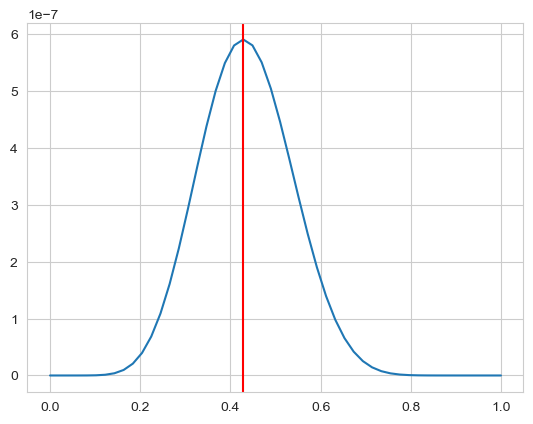

In [8]:
p = np.linspace(0, 1, num=50)
ax = plt.plot(p, Gnp_likelihood(p, n))
plt.axvline(x=Gnp_MLE(n), color='red')

In [9]:
def Gnp_log_likelihood(p, network: pp.Network):
    return network.number_of_edges()*np.log10(p) + (scipy.special.binom(network.number_of_nodes(), 2)-network.number_of_edges()) * np.log10(1-p)

In [10]:
n_highschool = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM highschool',directed=False)
print(n_highschool)
n_highschool.plot()

[06-24 11:35:12: WARNING] 154 edges existed already and were not be considered. To capture those edges, consider creating a multiedge and/or directed network.
Uid:			0x7f807086cdf0
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	120
Number of edges:	348


In [11]:
Gnp_log_likelihood(Gnp_MLE(n_highschool), n_highschool)

-604.0074314022678

In [12]:
n_highschool_r = pp.generators.ER_nm_randomize(n_highschool)
Gnp_log_likelihood(Gnp_MLE(n_highschool), n_highschool_r)

-604.0074314022678

In [13]:
def Gnp_degree_log_likelihood(p, network: pp.Network):
    l = 0
    for k in network.degree_sequence():
        l += np.log10(scipy.special.binom(network.number_of_nodes(), k)) + k * np.log10(p) + (network.number_of_nodes()-k) * np.log(1-p)
    return l

In [14]:
Gnp_degree_log_likelihood(Gnp_MLE(n_highschool), n_highschool)

-506.47460235056326

In [15]:
Gnp_degree_log_likelihood(Gnp_MLE(n_highschool_r), n_highschool_r)

-506.6868625104319

In [16]:
n_gentoo = pp.io.sql.read_network('networks.db', sql='SELECT source, target FROM gentoo', directed=False)
print(n_gentoo)
n_gentoo.plot()

Uid:			0x7f80388f0e50
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	403
Number of edges:	513


In [17]:
Gnp_log_likelihood(Gnp_MLE(n_gentoo), n_gentoo)

-1349.8569477477868

In [18]:
n_gentoo_r = pp.generators.ER_nm_randomize(n_gentoo)
print(n_gentoo_r)
Gnp_log_likelihood(Gnp_MLE(n_gentoo_r), n_gentoo_r)

Uid:			0x7f8050c381f0
Type:			Network
Directed:		False
Multi-Edges:		False
Number of nodes:	403
Number of edges:	513


-1349.8569477477868

In [19]:
Gnp_degree_log_likelihood(Gnp_MLE(n_gentoo), n_gentoo)

-1359.3123496318583

In [20]:
Gnp_degree_log_likelihood(Gnp_MLE(n_gentoo_r), n_gentoo_r)

-903.1162701916933